#### Group Information

Group No: Climate_3

- Member 1: LIM CHIN FENG (157968)
- Member 2: OOI YUE SHENG (158494)
- Member 3: GWEE PER MING (159372)
- Member 4: OOI YONG QIN (159067)

#### Import Libraries

In [1]:
%config Completer.use_jedi=False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#### Load the dataset

In [2]:
dataset = pd.read_csv('assignment1_dataset.csv')
# add a column with f0 = 1 for all data points, so that we can obtain w0, the intercept
dataset.insert (0, "f0", 1)

In [3]:
# check for duplicates
duplicate = dataset[dataset.duplicated()]
print(dataset.duplicated().sum(), "\n")

0 



In [4]:
# understanding the data
dataset.info()
print('\nData Shape:  {}'.format(dataset.shape))
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   f0        1000 non-null   int64  
 1   f1        1000 non-null   float64
 2   f2        1000 non-null   float64
 3   f3        1000 non-null   float64
 4   f4        1000 non-null   float64
 5   f5        1000 non-null   float64
 6   response  1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB

Data Shape:  (1000, 7)
   f0        f1        f2        f3        f4        f5   response
0   1 -0.764216 -1.016209  0.149410 -0.050119 -0.578127   6.242514
1   1  0.763880 -1.159509 -0.721492 -0.654067 -0.431670  -8.118241
2   1  0.519329 -0.664621 -1.694904  1.339779  0.182764  66.722455
3   1 -0.177388  0.515623  0.135144 -0.647634 -0.405631 -27.716793
4   1  0.104022  0.749665 -0.939338 -0.090725 -0.639963   8.192075


#### Define the loss function

In [5]:
#  loss function using MSE
def loss_fn(y, yhat):
    """ Pass two arguments
    Arguments:
        y: responses
        yhat: predicted value
    Returns:
        loss: loss value
    """
    # differencce between the prediction and responses 
    diff = yhat - y
    # square the difference
    squaredDiff = diff ** 2
    # obtain the loss using loss function, J(W) formula, multiply by 1/2 to cancel out the 2 post differentiation
    loss = (1/(2*len(y)))*sum(squaredDiff)
    return loss

#### Define function to perform prediction

In [6]:
def predict(w,x):
    """ Pass two arguments
    Arguments:
        w: weights
        X: input features
    Returns:
        yhat: predicted values
    """
    # using dot product between 2 matrices, x and w transpose to obtain the prediction. The prediction is made by multiplying the value of input features and their respective estimated weights
    yhat = np.dot(x, w.transpose())
    return yhat

#### Define function for model training
Display the training loss value for each epoch of the training loop. The displayed value must be in 3 decimal places.

In [7]:
def train_model(X, y, alpha, max_epoch):
    """ Pass four arguments
    Arguments:
        X: input features
        y: responses
        alpha: learning rate
        max_epoch: maximum epochs
    Returns:
        w: estimated weights
        hist_loss: training loss history
    """
    # store the number of rows/columns of the input features data in m, n
    # m is the number of rows of datas
    # n is the number of input features
    m, n = X.shape
    # use a seed for the random number generator
    np.random.seed(123)
    # randomly initialise weights
    w = np.random.rand(n)  
    # initialize history of training loss values with 0
    hist_loss = np.zeros(max_epoch)  

    print("Training loss value for each epoch (Mean Square Error):")
    for epoch in range(max_epoch):
        # create predictions by using dot product between 2 matrices, x and w transpose
        # use flatten to flatten the predictions into a 1D array
        y_hat = np.dot(X, w.transpose()).flatten()  
        # compute error, which is the difference between prediction and response
        error = y - y_hat  
        # compute loss using loss_fn function
        loss = loss_fn(y, y_hat)  
        # add the value of training loss of each epoch into the hist_loss array
        hist_loss[epoch] = loss
        # print the training loss at each epoch, displaying only 3 decimal places with no trailing zeroes
        print("Epoch {}: {}".format(epoch+1, round(loss, 3))) 
        
        for i in range(n):
            # calculate gradient of cost function with respect to weights of each different input features using the dJ/dWi formula for i = 0,1,2,...n 
            gradient = (-1/m)*np.dot(X.iloc[:,i].transpose(), error) 
            # update weights of each different input features while taking into account of the learning rate
            w[i] = w[i] - (alpha * gradient)  

    return w, hist_loss

#### Split the dataset
The ratio of training and test is 8:2.

In [8]:
# Store all the column except the last column(features) in X
X = dataset.iloc[:, :-1]
# Store the last column(responses) in y
y = dataset.iloc[:, -1]
# split the dataset using train_test_split in 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

#### Train the model

In [9]:
w, hist_loss = train_model(X_train, y_train, 0.01, 1000)

Training loss value for each epoch (Mean Square Error):
Epoch 1: 822.464
Epoch 2: 805.121
Epoch 3: 788.151
Epoch 4: 771.545
Epoch 5: 755.297
Epoch 6: 739.398
Epoch 7: 723.841
Epoch 8: 708.618
Epoch 9: 693.723
Epoch 10: 679.147
Epoch 11: 664.885
Epoch 12: 650.929
Epoch 13: 637.273
Epoch 14: 623.911
Epoch 15: 610.835
Epoch 16: 598.041
Epoch 17: 585.521
Epoch 18: 573.27
Epoch 19: 561.282
Epoch 20: 549.551
Epoch 21: 538.072
Epoch 22: 526.84
Epoch 23: 515.849
Epoch 24: 505.093
Epoch 25: 494.569
Epoch 26: 484.27
Epoch 27: 474.192
Epoch 28: 464.331
Epoch 29: 454.681
Epoch 30: 445.238
Epoch 31: 435.997
Epoch 32: 426.955
Epoch 33: 418.106
Epoch 34: 409.448
Epoch 35: 400.975
Epoch 36: 392.683
Epoch 37: 384.569
Epoch 38: 376.629
Epoch 39: 368.86
Epoch 40: 361.256
Epoch 41: 353.816
Epoch 42: 346.535
Epoch 43: 339.41
Epoch 44: 332.438
Epoch 45: 325.615
Epoch 46: 318.938
Epoch 47: 312.404
Epoch 48: 306.01
Epoch 49: 299.752
Epoch 50: 293.629
Epoch 51: 287.637
Epoch 52: 281.773
Epoch 53: 276.034
Epoch

#### Display the estimated weights

In [10]:
print("Estimated weight")
for i in range(len(w)):
    print("Weight for x{}: {}".format(i, w[i]))

Estimated weight
Weight for x0: 9.581437849854456
Weight for x1: 11.815896204224828
Weight for x2: -0.150293412237612
Weight for x3: -0.09137021362575613
Weight for x4: 36.78237352864624
Weight for x5: 0.14411869319144116


#### Display the training loss against epoch graph

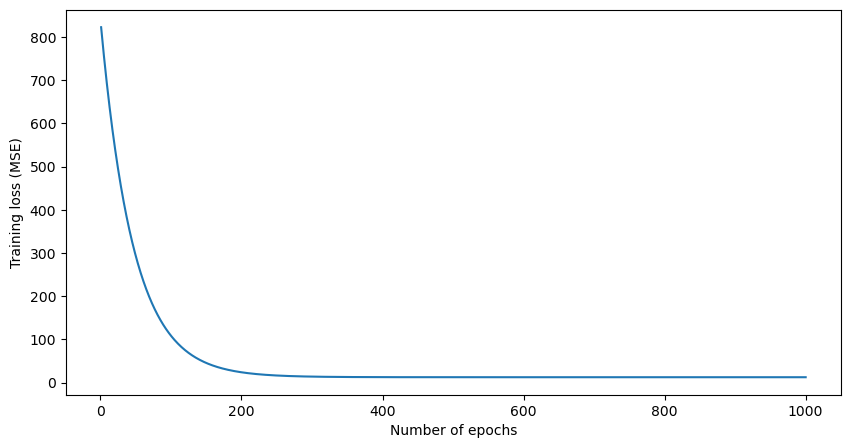

In [11]:
# create a graph
fig = plt.figure()
# n is the x axis, indicating the number of epochs, starting from 1
n = [i for i in range (1, len(hist_loss)+1)]
plt.plot(n, hist_loss, label='Training loss')
plt.xlabel("Number of epochs")
plt.ylabel("Training loss (MSE)")

fig.set_size_inches(10,5)
plt.show()

#### Predict the test set

In [12]:
y_hat = predict(w,X_test)

In [13]:
# Display the prediction and response(actual)

# Create a table to store the value of prediction and response
predictionTable = pd.DataFrame()
predictionTable['Prediction'] = pd.Series(y_hat)
# use to_numpy to convert y_test from pandas series to an array
predictionTable["Response"] = y_test.to_numpy()
print(predictionTable)

     Prediction   Response
0      3.606770   3.095749
1    -13.235243 -10.581404
2    -22.018798 -28.364366
3     -0.165111   1.710863
4     56.448542  57.922620
..          ...        ...
195   37.570538  33.747912
196   59.886044  68.426471
197  -75.772197 -75.553672
198  -34.683819 -27.871106
199  -34.977032 -35.764376

[200 rows x 2 columns]


#### Display the r2 score, mean squared error and mean absolute error

In [14]:
print("Error analysis for test set:\n")
r2 = r2_score(y_test, y_hat)
print("R2 Score: {}".format(r2))
mse = loss_fn(y_test, y_hat)
print("Mean squared error: {}".format(mse))
mae = mean_absolute_error(y_test, y_hat)
print("Mean absolute error: {}".format(mae))

Error analysis for test set:

R2 Score: 0.984155735227071
Mean squared error: 13.439297306245628
Mean absolute error: 4.127486138413703


# Analysis
The following analysis is made with the assignment1_dataset.csv in mind, using the provided training function, with a training/test split of 8:2, learning rate(alpha) of 0.01 and number of epochs of 1000.

### R2 score:
R2 = 1 - SSE/SST, where SSE is the sum of squared errors between predictions and responses, while SST is the sum of squared errors of the baseline model where the prediction is always made with the mean of responses, y.
SSE  

The R2 value range from 0 to 1, and a higher value of R2 indicates better performance of the model.  
For the test set, since the R2 score is quite high at 0.984, we can say that its R2 score indicates that it is a well-performing model

### Mean squared error:
Mean squared error is the sum of the squared difference between the prediction(y_hat) and response(actual y).  

For the test set, the squared difference between the predicted and actual values of the target variable is 13.439, which is quite low and is similar to the MSE of the training set. This indicates that the model is working well and no overfitting had occurred.  

MSE is also used to calculate the loss function, the lowest value(local minima) is reached by the model at around 300 epochs with a learning rate(alpha) of 0.01, with MSE = 12.274 and plateuing after that.  

A lower value of mean squared error is desirable, through gradient descent, we are able to achieve the minimal loss function value, indicated by the decreasing mean squared error.  


### Mean absolute error: 
Mean absolute error is similar to mean squared error, but instead of squaring the error, we just apply the absolute value function on it, so that the error is always >= 0. (Chugh, 2020)

Compared to mean squared error, due to the lack of squaring, mean absolute error punishes large error less.

For the test set, the the mean absolute error is 4.127. This means that on average, the predictions will differ from the responses by 4.127. The low mean absolute error indicates that the model performs well.

## Reference(s):
Chugh, A. (2020, December 8). MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared — Which Metric is Better? Medium. https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e  

Noor M.H.M. (2023). Gradient Descent – Halim Noor. Halim Noor. https://halimnoor.com/gradient-descent/  

Noor M.H.M. (2023). Linear Regression – Halim Noor. Halim Noor. https://halimnoor.com/linear-regression/